In [101]:
import pandas as pd 

path = 'tree_data/total.csv'
df = pd.read_csv(path)
df = df[['batch_size', 'learning_rate','dropout', 'activation', 'optimizer', 'val_loss']].dropna()
df

,batch_size,learning_rate,dropout,activation,optimizer,val_loss
0,59,0.047111,0.555048,tanh,Adadelta,0.068092
1,72,0.042145,0.429841,relu,adam,0.081408
2,11,0.006101,0.336178,sigmoid,RMSProp,0.086774
4,93,0.097626,0.524422,tanh,adam,0.304407
6,13,0.051244,0.449768,sigmoid,adam,0.085097
...,...,...,...,...,...,...
2379,30,0.007712,0.572688,relu,RMSProp,0.074061
2380,33,0.001118,0.297824,tanh,SGD,0.071403
2381,44,0.009446,0.491927,tanh,Adam,0.076653
2382,39,0.008137,0.609102,relu,RMSProp,0.073277


In [102]:
idx_name = df[df['activation'] == 'sigmoid'].index
df.drop(idx_name, inplace=True)
df

,batch_size,learning_rate,dropout,activation,optimizer,val_loss
0,59,0.047111,0.555048,tanh,Adadelta,0.068092
1,72,0.042145,0.429841,relu,adam,0.081408
4,93,0.097626,0.524422,tanh,adam,0.304407
7,23,0.071291,0.488866,relu,RMSProp,0.216903
8,46,0.064336,0.462782,relu,adam,0.341760
...,...,...,...,...,...,...
2379,30,0.007712,0.572688,relu,RMSProp,0.074061
2380,33,0.001118,0.297824,tanh,SGD,0.071403
2381,44,0.009446,0.491927,tanh,Adam,0.076653
2382,39,0.008137,0.609102,relu,RMSProp,0.073277


In [103]:
import category_encoders as ce 

encoder = ce.OneHotEncoder(use_cat_names=True)
X = encoder.fit_transform(df[['learning_rate','dropout', 'batch_size', 'activation', 'optimizer']])
y = df['val_loss']
y

c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0       0.068092
1       0.081408
4       0.304407
7       0.216903
8       0.341760
          ...   
2379    0.074061
2380    0.071403
2381    0.076653
2382    0.073277
2383    0.074949
Name: val_loss, Length: 1969, dtype: float64

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

X_train, X_val, y_train,  y_val = train_test_split(X, y)

model = DecisionTreeRegressor()
# model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [105]:
# import matplotlib

#high quality tree plot
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(150, 100)
# tree.plot_tree(model)

In [106]:
tmp  = permutation_importance(model, X_val, y_val, n_repeats=10)
feature_names = [f'{i}' for i in X.columns]
per_importance = pd.Series(tmp.importances_mean, index=feature_names).sort_values(ascending=False)
per_importance

activation_elu        1.526922
batch_size            0.567380
dropout               0.530654
learning_rate         0.479450
optimizer_adam        0.381876
optimizer_RMSProp     0.086742
activation_tanh       0.008418
optimizer_SGD         0.004106
optimizer_Adadelta    0.002259
optimizer_Adam        0.000001
activation_relu       0.000001
dtype: float64

In [107]:
import plotly.express as px 

fig = px.bar(per_importance, text=np.around(per_importance.values, 3))
fig.show()

In [109]:
from sklearn.tree import plot_tree
import seaborn as sns

# plot_tree(model)
# plt.show()
# importance = model.feature_importances_
# indices = np.argsort(importance)
# plt.barh(range(len(indices)), importance[indices])
# plt.yticks(range(len(indices)), np.array(X.columns)[indices])
# plt.show()

<AxesSubplot: >

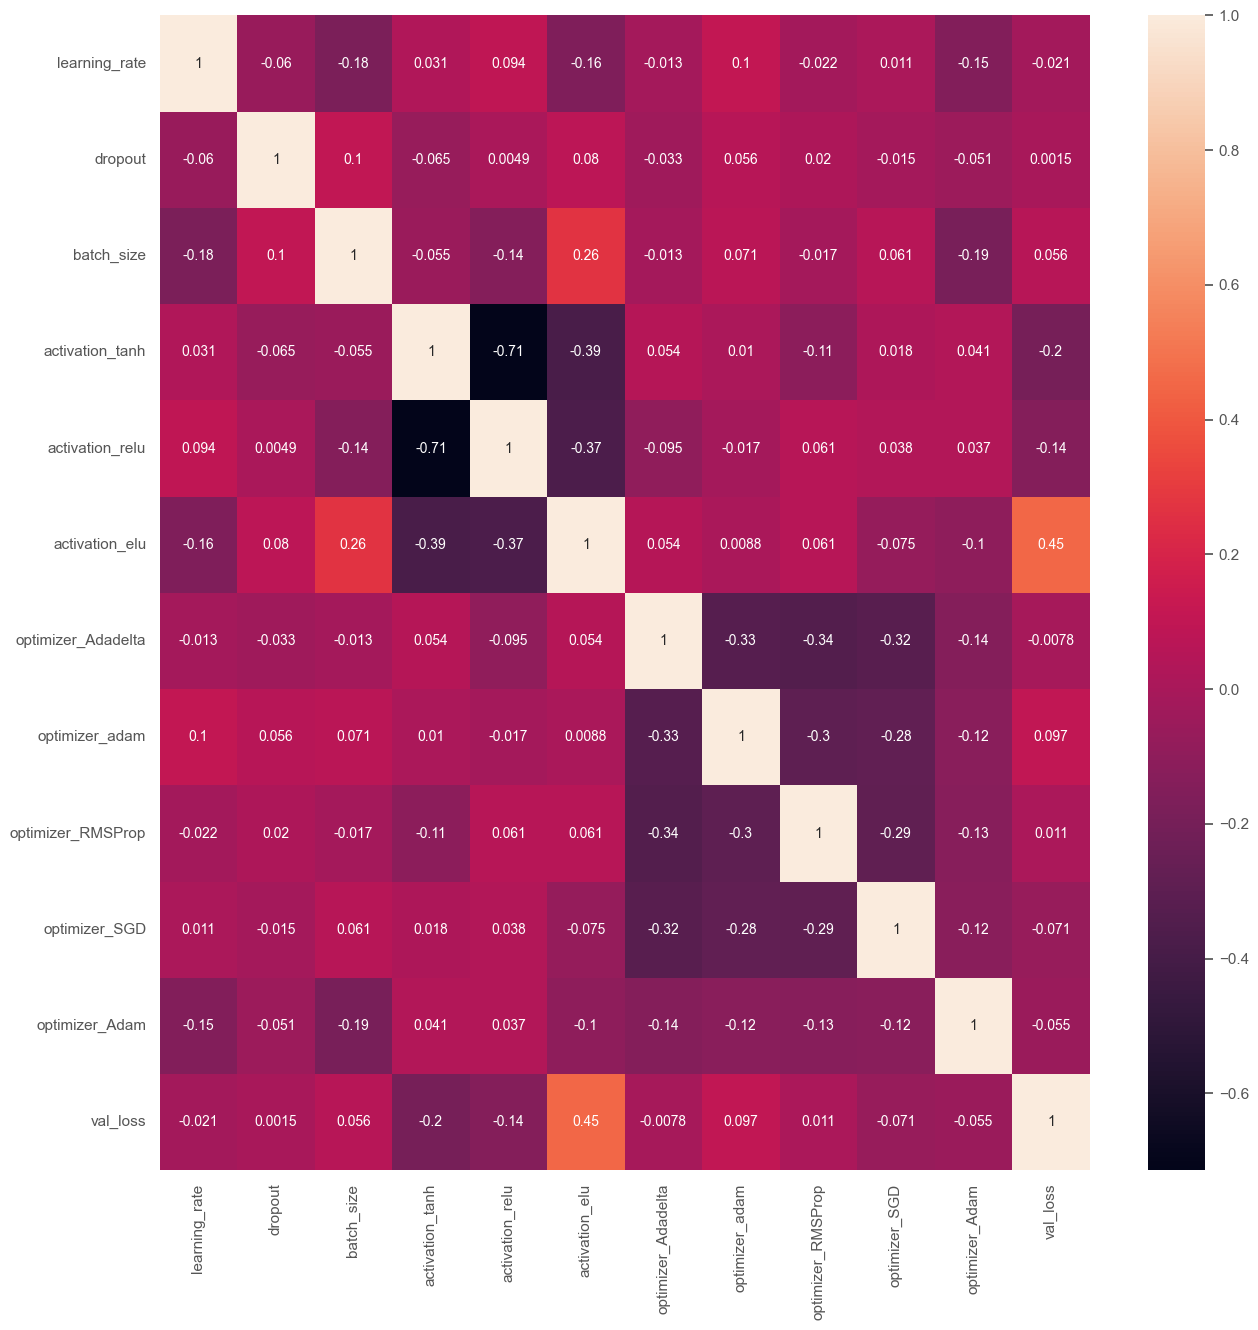

In [110]:
plt.figure(figsize=(15,15))
Z = pd.concat([X, y], axis=1)
sns.heatmap(Z.corr(), annot=True)

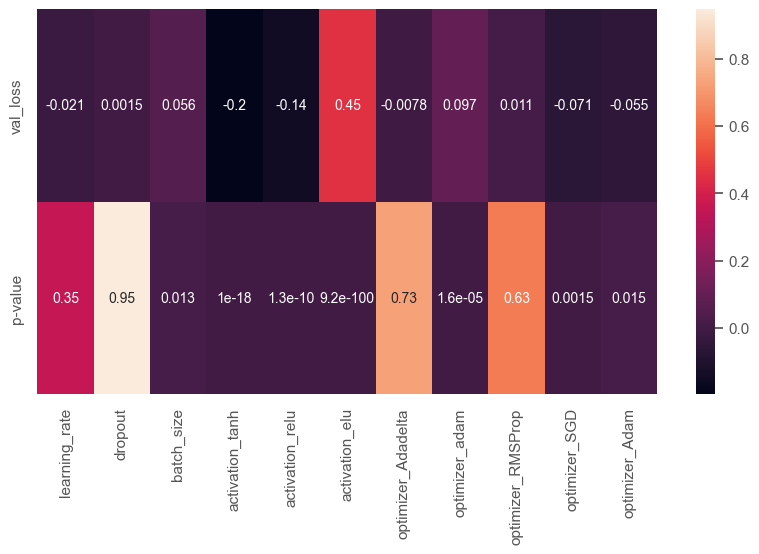

In [111]:
import scipy
corr_tmp, p_val_tmp = [], []
for i in X.columns:
    corr, p_val = scipy.stats.pearsonr(X[i], y)
    corr_tmp.append(corr)
    p_val_tmp.append(p_val)

tmp = [np.array(corr_tmp), np.array(p_val_tmp)]
df_corr = pd.DataFrame(data=tmp, columns=X.columns, index=['val_loss', 'p-value'])
sns.heatmap(df_corr, annot=True)
sns.set(rc={'figure.figsize':(10, 5)})